# Introducción a las redes neuronales profundas
# Proyecto 2 

Clasificar los vectores x1 y x2 usando backpropagation en una red neuronal shallow, para ello usar los siguientes métodos:

1. Usando SDBP
2. Método de momento
3. Método de Levenberg-Marquardt

In [33]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import Sequential
%matplotlib inline

In [2]:
x1 = np.array([[-4,-3],[-4,-1],[-3,-3],[-3,-1],[-3,0],[-2,-2],[0,-1],[1,-1],[1,0],[1,2],
               [2,-1],[2,1],[2,2],[2,3],[2,4],[3,-4],[3,-3],[3,-2],[3,-1],[4,-1]])

x2 = np.array([[-1,-4],[-1,-3],[-1,2],[-1,3],[-1,4],[0,-4],[0,-3],[0,2],[1,-5],[1,-4],
               [1,4],[3,2],[3,3],[4,1],[4,2]])

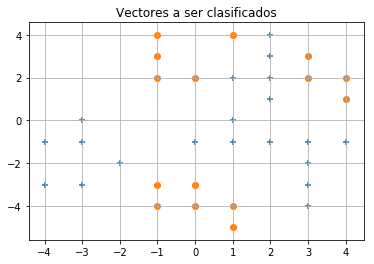

In [30]:
plt.scatter(x1[:,0], x1[:,1], marker='+')
plt.scatter(x2[:,0], x2[:,1], marker='o')
plt.title('Vectores a ser clasificados')
plt.grid(True)
plt.show()

In [51]:
X = np.concatenate((x1, x2))
y = np.concatenate((np.zeros(20), np.ones(15)))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Método SDBP

In [108]:
net1 = Sequential()
net1.add(Dense(100, activation='tanh', input_shape=(2,)))
net1.add(Dense(100, activation='relu'))
net1.add(Dense(1, activation='sigmoid'))

In [109]:
net1.compile(optimizer=SGD(lr=0.01), 
             loss='binary_crossentropy', 
             metrics=['accuracy'])

In [110]:
net1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_21 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 101       
Total params: 10,501
Trainable params: 10,501
Non-trainable params: 0
_________________________________________________________________


In [111]:
net1.fit(X, y, epochs=100, batch_size=1)

Epoch 1/100
35/35 [==============================] - 0s 12ms/step - loss: 0.6860 - acc: 0.6000
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6237 - acc: 0.7429
Epoch 3/100
35/35 [==============================] - 0s 1ms/step - loss: 0.5813 - acc: 0.8000
Epoch 4/100
35/35 [==============================] - 0s 1ms/step - loss: 0.5579 - acc: 0.7714
Epoch 5/100
35/35 [==============================] - 0s 1ms/step - loss: 0.5441 - acc: 0.7429
Epoch 6/100
35/35 [==============================] - 0s 1ms/step - loss: 0.5329 - acc: 0.8286
Epoch 7/100
35/35 [==============================] - 0s 1ms/step - loss: 0.5181 - acc: 0.7429
Epoch 8/100
35/35 [==============================] - 0s 1ms/step - loss: 0.5060 - acc: 0.7714
Epoch 9/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4960 - acc: 0.8000
Epoch 10/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4842 - acc: 0.7714
Epoch 11/100
35/35 [==============================] - 0s 1

In [114]:
steps = 500
xx, yy = np.meshgrid(np.linspace(-8, 8, steps), np.linspace(-8, 8, steps))

grid_prediction = np.round(net1.predict(np.hstack((xx.reshape(steps*steps, 1), yy.reshape(steps*steps, 1)))))
grid_prediction.shape = (steps, steps)

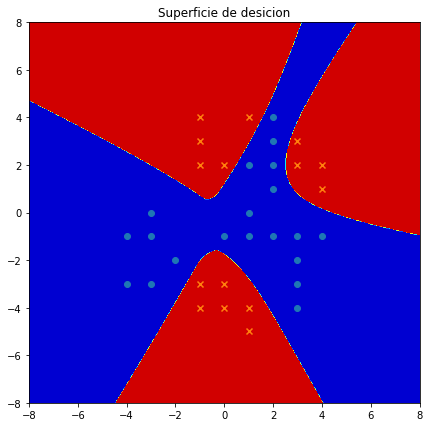

In [115]:
plt.figure(figsize=(7,7))
plt.contourf(xx, yy, grid_prediction>0.5, cmap='jet')
plt.scatter(x1[:,0], x1[:,1])
plt.scatter(x2[:,0], x2[:,1], marker='x')
plt.title('Superficie de desicion')
plt.show()

### Método de momento

In [89]:
net1.compile(optimizer=SGD(lr=0.01, momentum=0.5, nesterov=True), 
             loss='binary_crossentropy', 
             metrics=['accuracy'])

In [92]:
net1.fit(X, y, epochs=30, batch_size=1)

Epoch 1/30
35/35 [==============================] - 0s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 2/30
35/35 [==============================] - 0s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 3/30
35/35 [==============================] - 0s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 4/30
35/35 [==============================] - 0s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 5/30
35/35 [==============================] - 0s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 6/30
35/35 [==============================] - 0s 890us/step - loss: nan - acc: 0.0000e+00
Epoch 7/30
35/35 [==============================] - 0s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 8/30
35/35 [==============================] - 0s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 9/30
35/35 [==============================] - 0s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 10/30
35/35 [==============================] - 0s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 11/30
35/35 [==============================] - 0s 1

### Método de Levenberg-Marquardt